<a href="https://colab.research.google.com/github/Dhruv36/K-means-clustering-from-scratch/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # used for data manipulation
from sklearn.datasets import load_iris # used to load the data
import matplotlib.pyplot as plt   # used to show the results. Result analysis 

In [ ]:
data = load_iris().data     #store the dataset into a variable.
target = load_iris().target

In [ ]:
def euclidean_distance(point_1, point_2):    # This function will help us to find the distance between two points 
    return (np.sum((point_1 - point_2)**2))**0.05

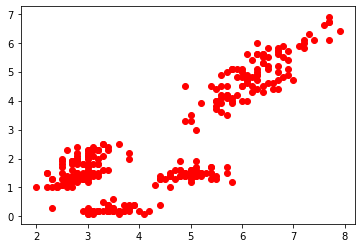

In [ ]:
plt.scatter(data[:,:2],data[:,2:4],c='red')  # this will show how are data is scatter. This will help us to understand the data.
plt.show()

In [ ]:
class k_means():   # Main K-means classs in which all the algorithm function/methods are used.
    
    def __init__(self, K=3, maximun_iteration=200, plotting_step=False):   # Initially I have used K=3 and maximum iteration = 50 as a default value
        #initializing all the values.
        
        self.centroid = []       # Here all the actual centroids are stored 
        self.K = K       # initiailizaion of the K but will choose K with the help of elbow method
        self.cluster_indeces  = [[] for i in range(self.K)]   # Here all the indeces of the cluster are stored
        self.maximun_iteration = maximun_iteration   # this will help to update the distance between the cluster and centroids
        self.plotting_step = plotting_step           # I will plot the graph which will help us to look on the performance of different k values
    
    # Creating cluster
    def _create_cluster(self, centroid):    # This function will help us to give the random sample to the closest centoids by computing the closest cluster.
        cluster_indeces  = [[] for i in range(self.K)]
        for index, samples in enumerate(self.X):
            centroid_index = self._compute_closest_centroids(samples, centroid)
            cluster_indeces[centroid_index].append(index)
        return cluster_indeces         
        
        
    def _compute_centroids(self, clusters):   # This function will help us to calculate the value of each centroids with respect to this cluster and will do avaerage of cluster to update the centroids
        centroid = np.zeros((self.K, self.sample_features))
        for cluster_indeces, cluster_sample in enumerate(clusters):
            cluster_average = np.mean(self.X[cluster_sample], axis=0)
            centroid[cluster_indeces] = cluster_average
        return centroid        
    
    
    def _cluster_labels(self, clusters):  # This function will help us to give every cluster a label or we can say that an unique identity
        clusters_label = np.empty(self.n_sample)
        for cluster_indexes, i in enumerate(clusters):
            for sample_index in i:
                clusters_label[sample_index] = cluster_indexes
        return clusters_label
    
            
    def _compute_closest_centroids(self, sample, centroid):  #This fucntion will help us to find the distance between all the points of sample to each of the centoids 
        dist = [euclidean_distance(sample, point) for point in centroid]
        closest_indexes = np.argmin(dist)
        return closest_indexes
    
    
    def get_cluster_centroid(self):   # This helper function will be used to find the K cluster so it's been added here.
        return self.centroid
    
    
    def cluster_prediction(self, X):    #Prediction fucntion 
        self.X = X
        self.n_sample, self.sample_features = X.shape  
        #old centroids/ actual centroids taken because we have to first take the centroids to make the cluster 
        random_indeces = np.random.choice(self.n_sample, self.K, replace=False)   #Initialization of the cluster and centroids #Numpy array has to be taken because in that we can pass, not to repeat the same randomly selected indeces
        self.centroid = [self.X[index] for index in random_indeces]
        for i in range(self.maximun_iteration):
            self.cluster_indeces = self._create_cluster(self.centroid)
            if self.plotting_step:
                self.graph_plotting()
            update_centroids = self.centroid
            self.centroid = self._compute_centroids(self.cluster_indeces)
            if self.plotting_step:
                self.graph_plotting()
            if self._converged(update_centroids, self.centroid):
                break      
        return self._cluster_labels(self.cluster_indeces)
    
    #Helper function will be used in prediction to give the distance between update_centroids, centroids              
    def _converged(self, update_centroids, centroids):    #This function will calculate the eculidean distance between centroids and cluster to update the centroids 
        dist = [euclidean_distance(update_centroids[i], centroids[i]) for i in range(self.K)]
        return sum(dist)==0
        
    
    
    def graph_plotting(self):   # Function to be used to show the cluster and iteration it takes to update the centroids and cluster and it will be clearly understand by plotting into the graph
        figure, ax = plt.subplots(figsize=(6,4))
        for i, j in enumerate(self.cluster_indeces):
            point = self.X[j].T
            ax.scatter(*point)
        for point in self.centroid:
            ax.scatter(*point, marker='x', color="red", linewidth=1)
        plt.show()

[681.3706000000001, 152.34795176035792, 78.851441426146, 71.76373890975626, 49.82774055829229, 49.20073040835206, 34.70370115753811, 36.79701779348103, 31.944162619243507, 27.793112794612796]


Text(0, 0.5, 'within-cluster sums of squares (WCSS)')

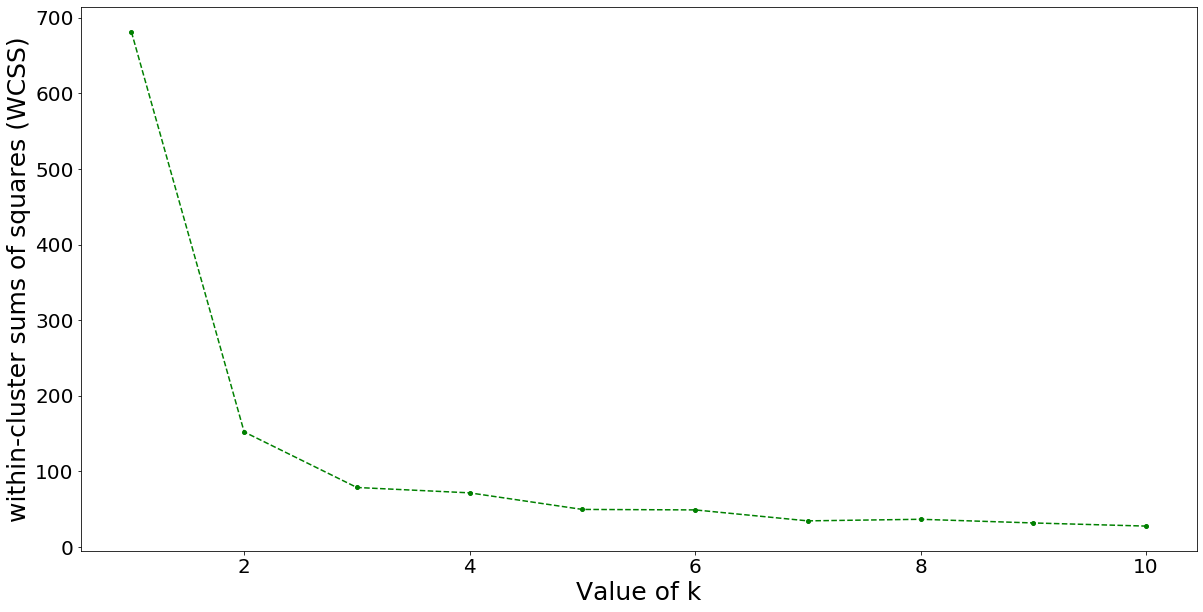

In [ ]:
# Elbow method to find the best K for the algorithm

WCSS_array = []
for k in range(1,11):
    k_mean = k_means(K=k)
    centroid_cluster_index = k_mean.cluster_prediction(data)
    centroids = k_mean.get_cluster_centroid()
    #print(centroids)
    
    wcss = 0
    for j in range(k):
        sum_up = 0
        for i,cci in enumerate(centroid_cluster_index):
            if cci == j:
                #print(cci)
                #print(j)
                #print(data[i])
                #print(centroids)
                diff = np.sum((data[i]-centroids[int(cci)])**2)
                #diff = euclidean_distance(data[i], centroids[int(cci)])
                #print(diff)
                sum_up = sum_up + diff
        wcss += sum_up
#     print("wcss"+ str(k))
#     print(wcss)
    WCSS_array.append(wcss)
    #break
print(WCSS_array)
    
k = range(1,11)     
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k, WCSS_array,'go--', linewidth=1.5, markersize=4) # Graph is plotted.
plt.xlabel('Value of k', fontsize = 25) # x-axis is labelled.
plt.ylabel('within-cluster sums of squares (WCSS)', fontsize = 25) # y-axis is labelled.


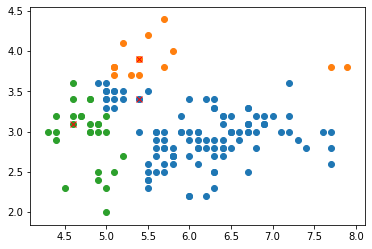

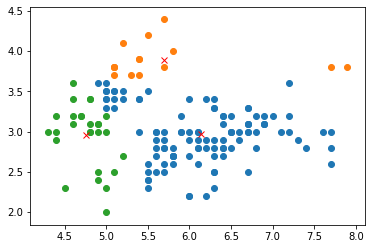

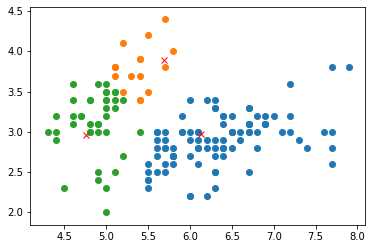

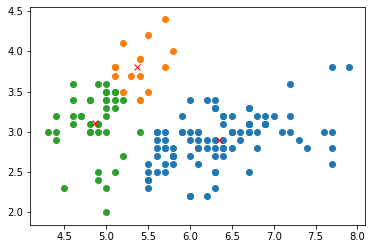

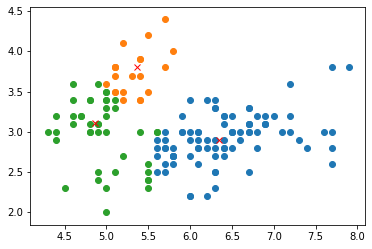

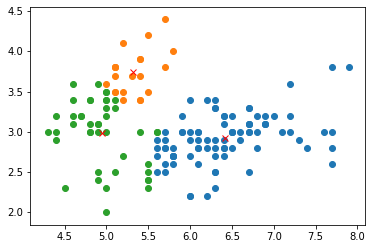

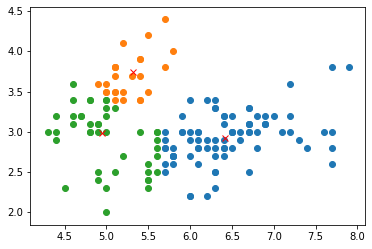

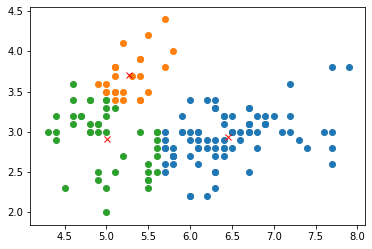

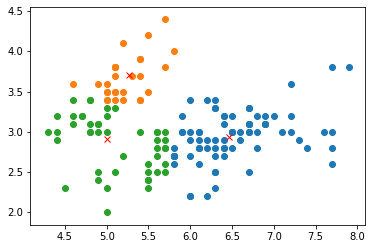

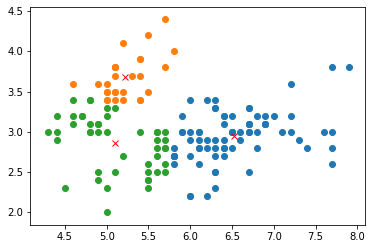

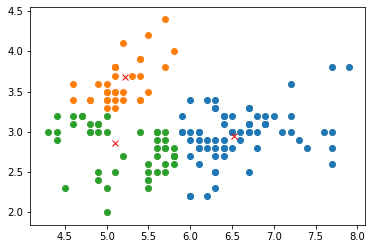

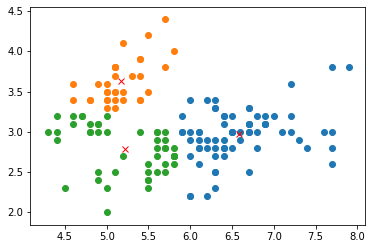

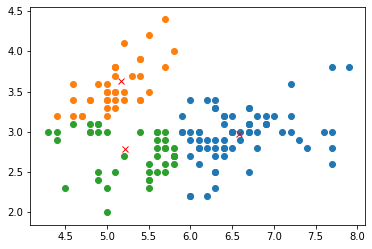

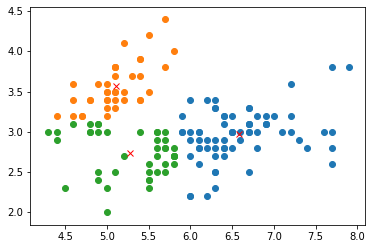

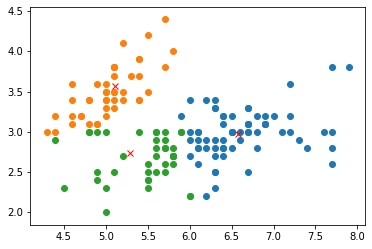

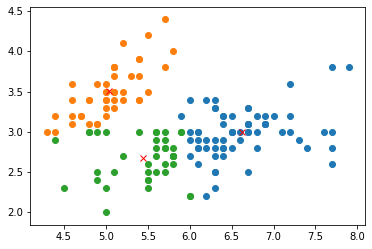

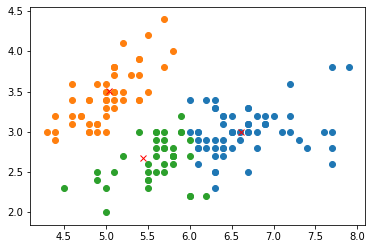

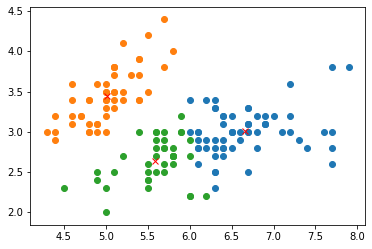

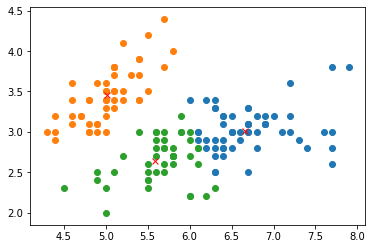

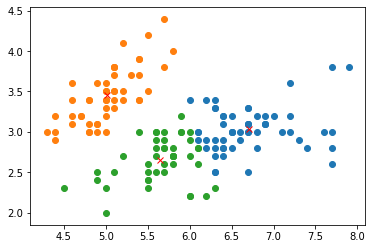

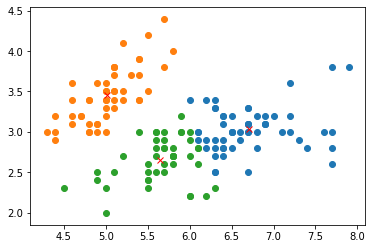

In [ ]:
np.random.seed(30)
clusters = 3
k = k_means (K=clusters, maximun_iteration=10,plotting_step=True)
y_pred = k.cluster_prediction(data[:,:2])

k.graph_plotting()

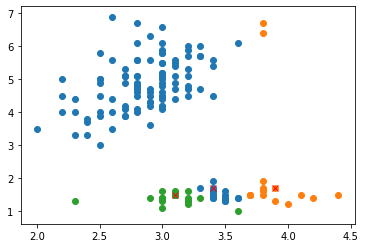

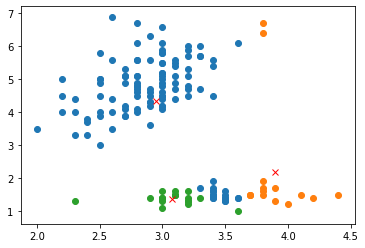

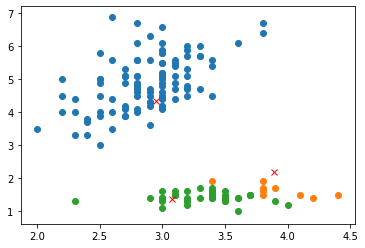

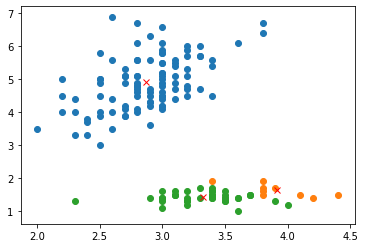

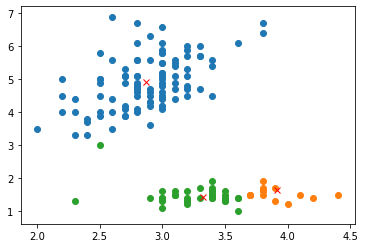

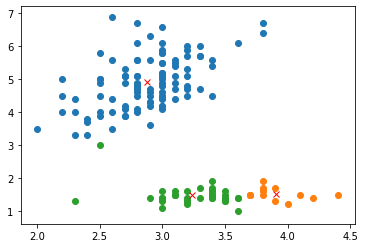

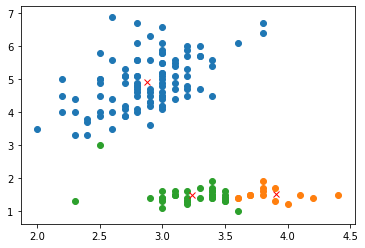

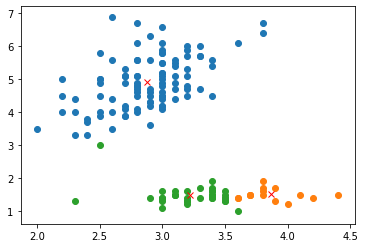

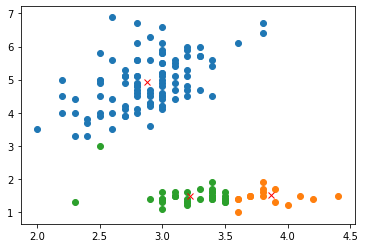

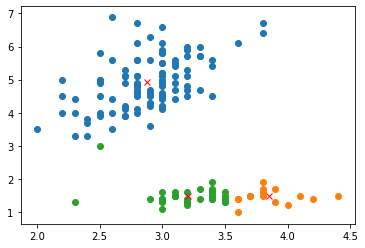

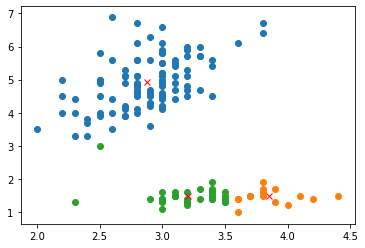

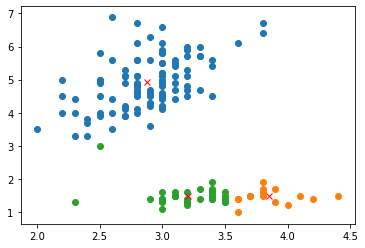

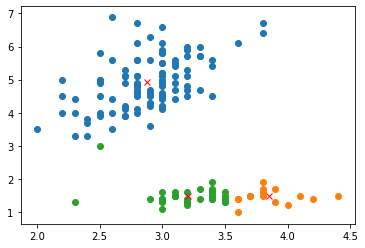

In [ ]:
np.random.seed(30)
clusters = 3
k = k_means (K=clusters, maximun_iteration=10,plotting_step=True)
y_pred = k.cluster_prediction(data[:,1:3])

k.graph_plotting()

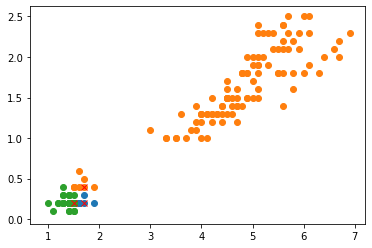

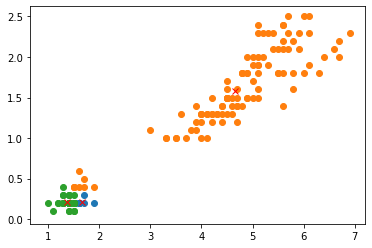

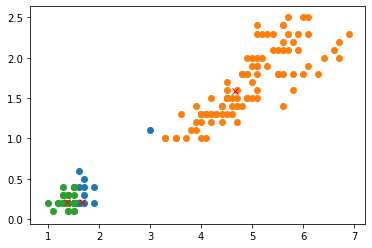

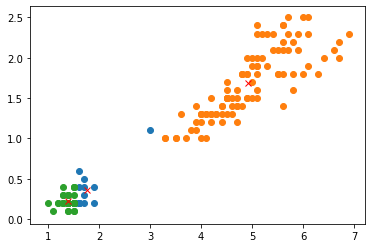

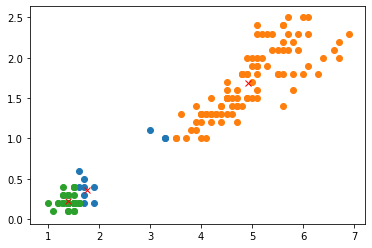

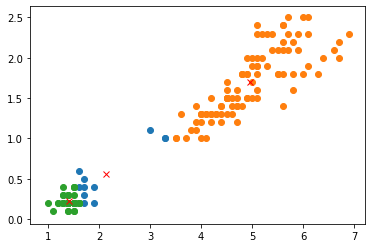

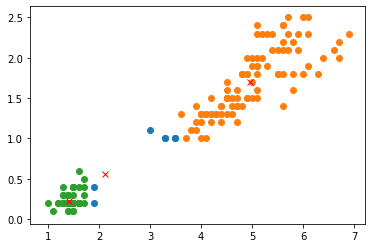

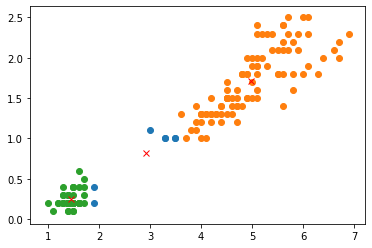

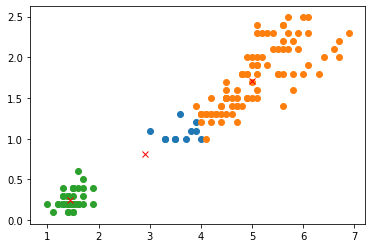

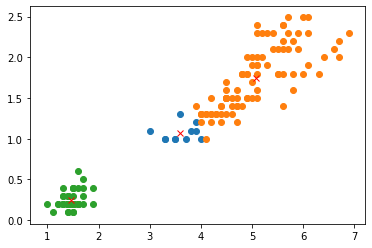

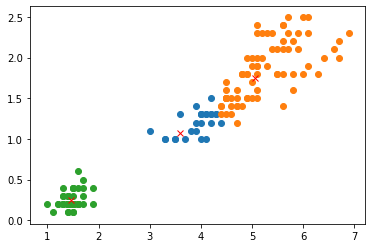

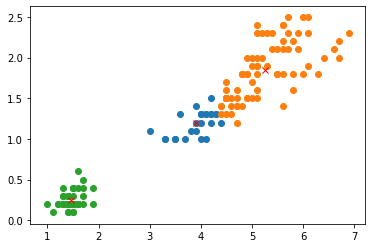

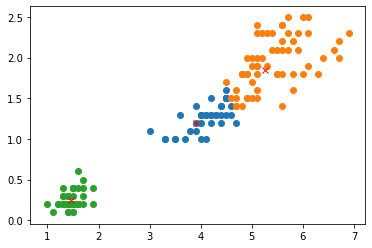

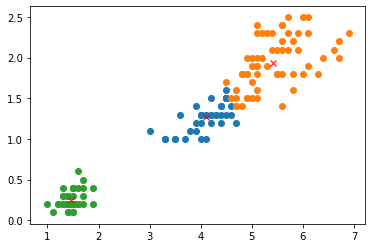

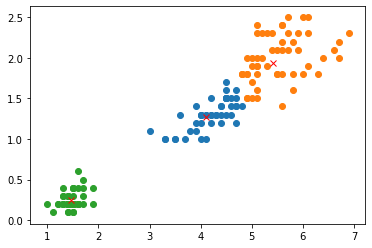

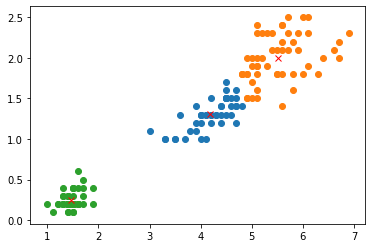

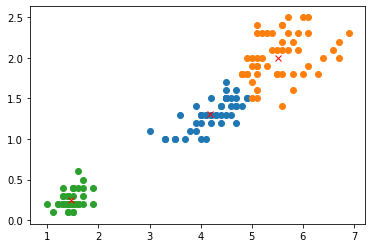

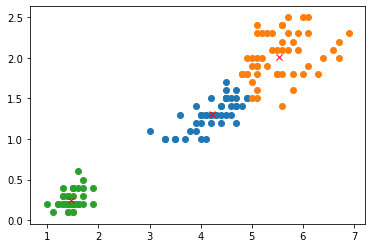

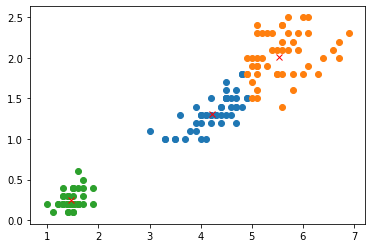

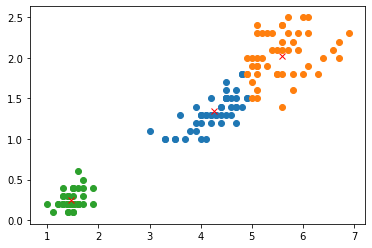

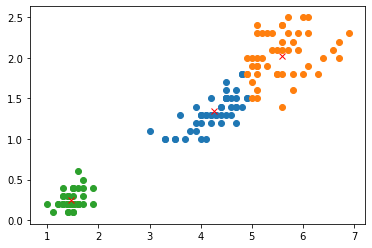

In [ ]:
np.random.seed(30)
clusters = 3
k = k_means (K=clusters, maximun_iteration=10,plotting_step=True)
y_pred = k.cluster_prediction(data[:,2:])

k.graph_plotting()

In [ ]:
np.random.seed(30)    # I have taken random so that each the end result should be the same otherwise result analysis in the report may differ.
clusters = 3
k = k_means(K=clusters, maximun_iteration=1,plotting_step=False)
y_pred = k.cluster_prediction(data[:,:])
centroid = k.get_cluster_centroid()

countp = 0
countk = 0
for j,d in enumerate(data):
    #print(d)
    #print(j)
    _min=None
    index = -1
    for i,c in enumerate(centroid):
#         print(i)
#         print(c)
        dist = euclidean_distance(c, d)
        if _min is None:
            _min = dist
            index = i
        else:
            if dist <= _min:
                _min = dist
                index = i
            
    if y_pred[j] == index:
        countp+=1
        #print("correct")
    else:
        countk+=1
        #print("incorrect")
        
print("Accuracy ",countp/150*100,"%")

Accuracy  64.0 %
